In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap

In [2]:
npzfile = np.load('fudge_factors.npz')

In [3]:
approx_fudge = npzfile['approx_fudge']
lower_fudge = npzfile['lower_fudge']
upper_fudge = npzfile['upper_fudge']

In [4]:
with open('droplet_indices.json', 'r') as file_pointer:
    droplet_indices = json.load(file_pointer)

In [5]:
len(droplet_indices)

23

In [6]:
for entry in droplet_indices.keys():
    print(len(droplet_indices[entry]))

2980
2996
5985
5920
15076
15077
30151
29967
59804
60169
149513
149169
297412
296989
588900
588330
1428318
1428482
2717557
2716584
4947672
4947589
5387039


In [7]:
np.sum(lower_fudge < approx_fudge)

15000000

In [8]:
np.sum(approx_fudge <= upper_fudge)

14982135

In [9]:
np.sum(approx_fudge > upper_fudge)

17865

It is possible for the logarithm of the upper bound factor to be negative when the upper bound factor itself is less than one. Evidently this does not happen often in practice, but does happen (in which case the approximate expression is guaranteed to be larger). Although the analogous approximate expression is guaranteed to be smaller than the Robbins upper bound (and lower bound) for the factorial itself, these expressions are products of factorials and reciprocals of factorials, making it less clear a priori whether the approximate expression will fall inside of the interval defined by the upper bound and lower bound of the true factorial expression.

## Grouping (Approximate) Fudge Factors by Strain

The code for generating this matrices was slow to run, so I only ran them once, saved the results, and then in subsequent versions of the notebook just loaded the results. Below is the original generating code:

In [10]:
# group_approx_fudge = np.zeros((len(droplet_indices), len(droplet_indices)))

# for i in range(len(droplet_indices)):
#     for j in range(len(droplet_indices)):
#         strain_i_indices = set(droplet_indices[str(i)])
#         strain_j_indices = set(droplet_indices[str(j)])
#         group_indices = strain_i_indices.intersection(strain_j_indices)
#         group_indices = np.array(list(group_indices)).astype(int)
#         relevant_approx_fudge = approx_fudge[group_indices - 1]
#         group_approx_fudge[i,j] = np.median(relevant_approx_fudge)

# group_lower_fudge = np.zeros((len(droplet_indices), len(droplet_indices)))

# for i in range(len(droplet_indices)):
#     for j in range(len(droplet_indices)):
#         strain_i_indices = set(droplet_indices[str(i)])
#         strain_j_indices = set(droplet_indices[str(j)])
#         group_indices = strain_i_indices.intersection(strain_j_indices)
#         group_indices = np.array(list(group_indices)).astype(int)
#         relevant_lower_fudge = lower_fudge[group_indices - 1]
#         group_lower_fudge[i,j] = np.min(relevant_lower_fudge)

# group_upper_fudge = np.zeros((len(droplet_indices), len(droplet_indices)))

# for i in range(len(droplet_indices)):
#     for j in range(len(droplet_indices)):
#         strain_i_indices = set(droplet_indices[str(i)])
#         strain_j_indices = set(droplet_indices[str(j)])
#         group_indices = strain_i_indices.intersection(strain_j_indices)
#         group_indices = np.array(list(group_indices)).astype(int)
#         relevant_upper_fudge = upper_fudge[group_indices - 1]
#         group_upper_fudge[i,j] = np.max(relevant_upper_fudge)
        
# np.savez_compressed('group_fudge.npz',
#                    group_approx_fudge=group_approx_fudge,
#                    group_lower_fudge=group_lower_fudge,
#                    group_upper_fudge=group_upper_fudge)
        


New code loading results after they have already been generated once:

In [11]:
npzfile2 = np.load('group_fudge.npz')
group_approx_fudge = npzfile2['group_approx_fudge']
group_lower_fudge = npzfile2['group_lower_fudge']
group_upper_fudge = npzfile2['group_upper_fudge']

In [12]:
assert np.all(group_upper_fudge.T == group_upper_fudge)
assert np.all(group_lower_fudge.T == group_lower_fudge)
assert np.all(group_approx_fudge.T == group_approx_fudge)

That should be true as a result of their definitions, but it's still reassuring to know for certain that it is true (i.e. that the code wasn't wrong).

In [13]:
def custom_formatter(x, pos):
    non_log_value = np.exp(x)
    percentage = np.around(100 * non_log_value, decimals=6)
    return '{}%'.format(percentage)

ticklabels=['.01%','.01%', '.02%', '.02%','.05%','.05%', '.1%','.1%',
             '.2%','.2%','.5%','.5%','1%','1%','2%','2%','5%','5%',
             '10%','10%','20%','20%']

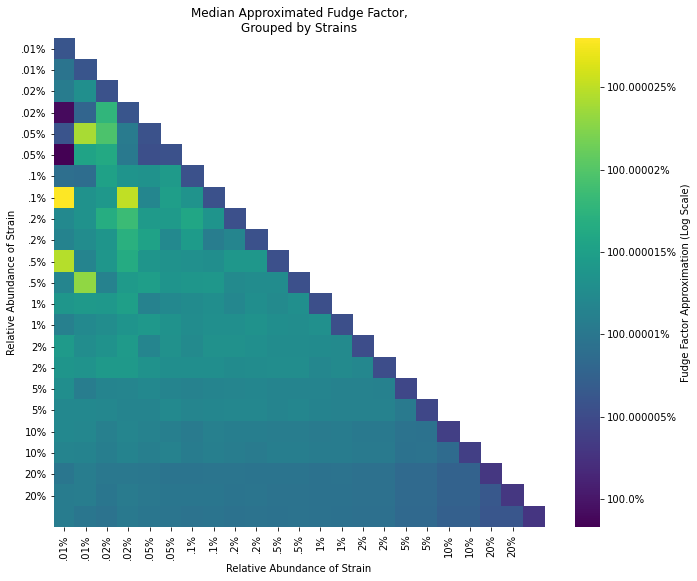

In [14]:
fig, ax = plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(group_approx_fudge, dtype=bool),k=1)
heatmap(group_approx_fudge, mask=mask, ax=ax, cbar_kws={'label':'Fudge Factor Approximation (Log Scale)'}, 
       cmap='viridis', xticklabels=ticklabels, yticklabels=ticklabels)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(custom_formatter)
ax.set_title('Median Approximated Fudge Factor,\nGrouped by Strains')
ax.set_xlabel('Relative Abundance of Strain')
ax.set_ylabel('Relative Abundance of Strain')
plt.show()

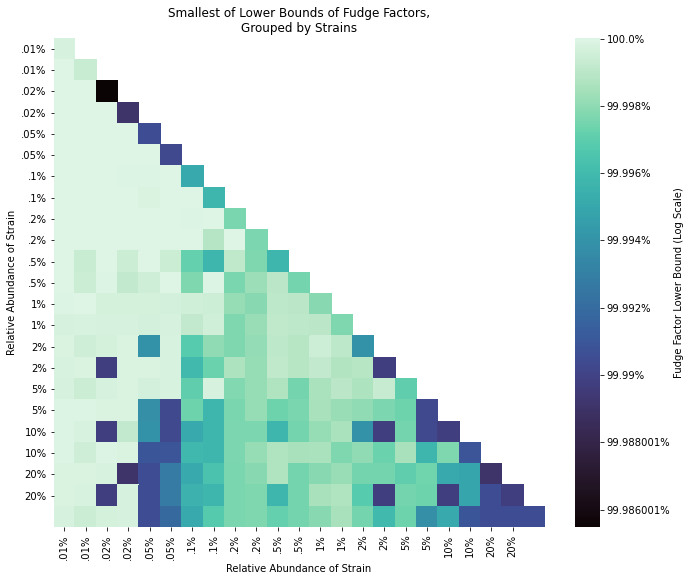

In [15]:
fig, ax = plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(group_lower_fudge, dtype=bool), k=1)
heatmap(group_lower_fudge, mask=mask, ax=ax, cbar_kws={'label':'Fudge Factor Lower Bound (Log Scale)'}, 
        cmap='mako', xticklabels=ticklabels, yticklabels=ticklabels)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(custom_formatter)
ax.set_title('Smallest of Lower Bounds of Fudge Factors,\nGrouped by Strains')
ax.set_xlabel('Relative Abundance of Strain')
ax.set_ylabel('Relative Abundance of Strain')
plt.show()

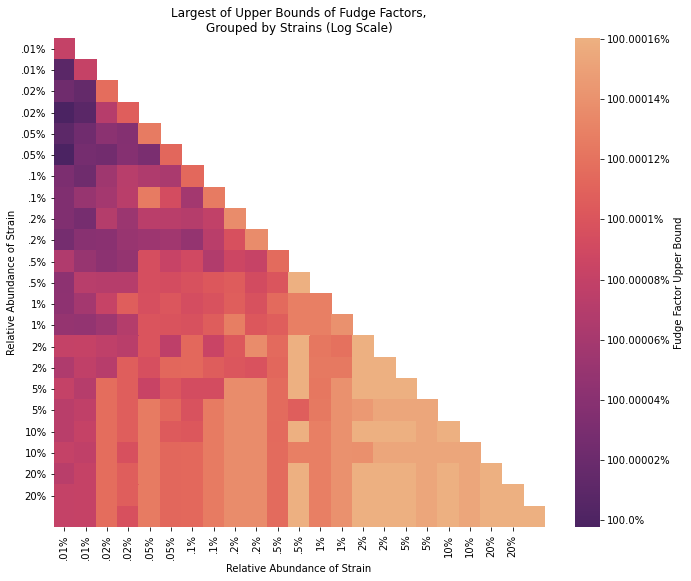

In [16]:
fig, ax = plt.subplots(figsize=(11,9))
mask = np.triu(np.ones_like(group_upper_fudge, dtype=bool),k=1)
heatmap(group_upper_fudge, mask=mask, ax=ax, cbar_kws={'label':'Fudge Factor Upper Bound'}, 
        cmap='flare_r', xticklabels=ticklabels, yticklabels=ticklabels)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.set_major_formatter(custom_formatter)
ax.set_title('Largest of Upper Bounds of Fudge Factors,\nGrouped by Strains (Log Scale)')
ax.set_xlabel('Relative Abundance of Strain')
ax.set_ylabel('Relative Abundance of Strain')
plt.show()